In [1]:
import os
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9994,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930410e+07,1.930410e+07,NaN,1,NaN,NaN,None,2023-02-28T13:26:00.000Z,23411.210291,2.272985e+10,27.3911,-0.330724,-0.443110,-5.014410,-0.705548,41.877740,38.724882,4.519323e+11,42.2492,4.916354e+11,None,2023-02-28T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 13:28:29.858370+00:00
1,1027,Ethereum,ETH,ethereum,6512,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-28T13:26:00.000Z,1633.972218,6.983260e+09,11.6527,-0.110262,-0.790278,-2.559692,1.071899,36.987746,28.822799,1.999555e+11,18.6989,1.999555e+11,None,2023-02-28T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 13:28:29.858370+00:00
2,825,Tether,USDT,tether,48486,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.093013e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-28T13:26:00.000Z,1.000122,3.210559e+10,26.6485,-0.008049,0.003130,-0.003599,-0.017029,0.042072,0.016230,7.093879e+10,6.6260,7.315069e+10,None,2023-02-28T13:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-28 13:28:29.858370+00:00
3,1839,BNB,BNB,bnb,1201,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578954e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-28T13:26:00.000Z,303.229469,3.743544e+08,2.8170,-0.108136,-0.620124,-3.049707,-3.925461,24.370244,0.918513,4.787853e+10,4.4774,4.851064e+10,None,2023-02-28T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 13:28:29.858370+00:00
4,3408,USD Coin,USDC,usd-coin,10382,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.248784e+10,4.248784e+10,NaN,5,NaN,NaN,None,2023-02-28T13:26:00.000Z,1.000048,3.295173e+09,20.2601,-0.013687,-0.004032,0.013956,-0.009552,0.000567,-0.005025,4.248990e+10,3.9682,4.248990e+10,None,2023-02-28T13:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-28 13:28:29.858370+00:00
5,52,XRP,XRP,xrp,895,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-02-28T13:26:00.000Z,0.377340,1.019322e+09,22.1879,-0.167839,0.480139,-3.802814,-8.559315,11.144193,-6.109085,1.922579e+10,1.7979,3.773396e+10,None,2023-02-28T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 13:28:29.858370+00:00
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.466671e+10,3.552041e+10,NaN,7,NaN,NaN,None,2023-02-28T13:26:00.000Z,0.362384,2.361891e+08,12.1008,-0.512098,-0.339757,-8.498896,-7.081487,49.778003,15.195690,1.256264e+10,1.1734,1.630726e+10,None,2023-02-28T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 13:28:29.858370+00:00
7,74,Dogecoin,DOGE,dogecoin,646,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2023-02-28T13:26:00.000Z,0.081633,3.393015e+08,49.2616,-0.243208,0.583509,-5.627056,-9.237768,20.102484,-22.834904,1.083030e+10,1.0115,1.083030e+10,None,2023-02-28T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 13:28:29.858370+00:00
8,3890,Polygon,MATIC,polygon,594,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.73

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df, df2], ignore_index=True)
    
    if not os.path.isfile("CruptoData.csv"):
        df.to_csv("CruptoData.csv", header="column_names")
    else:
        df.to_csv('CruptoData.csv', mode='a', header=False )

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed sucessfully!!')
    sleep(60)
exit()

API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!
API Runner completed sucessfully!!


KeyboardInterrupt: 

In [7]:
df.shape

(285, 36)

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.30925,-0.87222,-5.05421,-0.68627,41.99641,38.97118
Ethereum,-0.15790,-1.23752,-2.56351,1.09342,37.08581,29.06745
Tether,-0.00336,0.00449,-0.00093,-0.01306,0.04612,0.01885
BNB,-0.08647,-0.94651,-3.06311,-3.85185,24.46052,1.25982
USD Coin,-0.01419,-0.03153,0.00138,-0.01613,-0.01043,-0.00827
XRP,-0.12603,0.31624,-3.66746,-8.46702,11.39937,-5.86354
Cardano,-0.54871,-0.75474,-8.57983,-6.96890,49.96344,15.31944
Dogecoin,-0.23347,0.21287,-5.49700,-9.22447,20.35360,-22.32697
Polygon,-0.49637,-2.61538,-13.18748,4.24912,62.07850,41.07575


In [10]:
df4 = df3.stack().to_frame(name='values').reset_index().rename(columns={'level_1': 'percent_change'})
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df4

,name,percent_change,values
0,Bitcoin,1h,-0.30925
1,Bitcoin,24h,-0.87222
2,Bitcoin,7d,-5.05421
3,Bitcoin,30d,-0.68627
4,Bitcoin,60d,41.99641
5,Bitcoin,90d,38.97118
6,Ethereum,1h,-0.15790
7,Ethereum,24h,-1.23752
8,Ethereum,7d,-2.56351
9,Ethereum,30d,1.09342


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

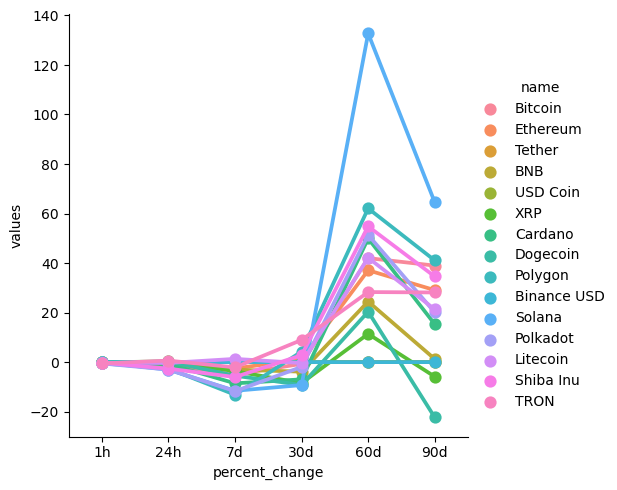

In [12]:
sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point')

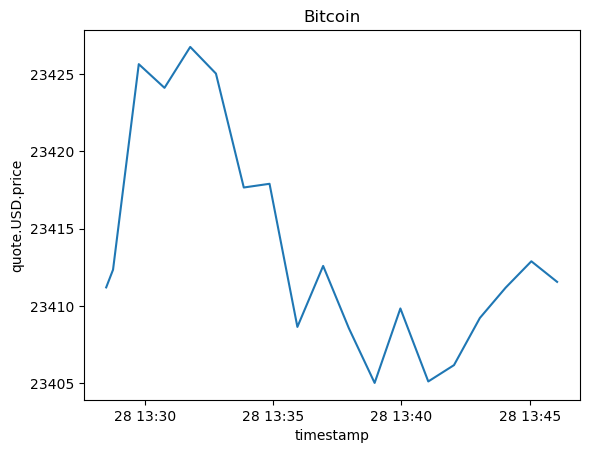

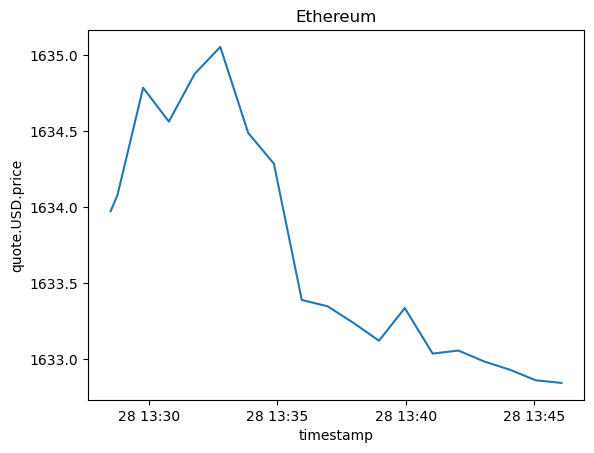

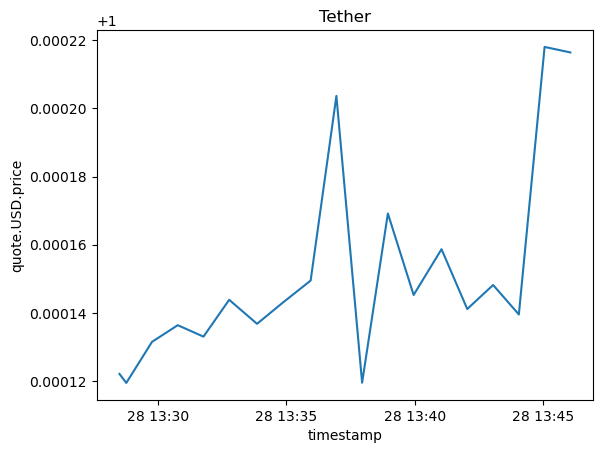

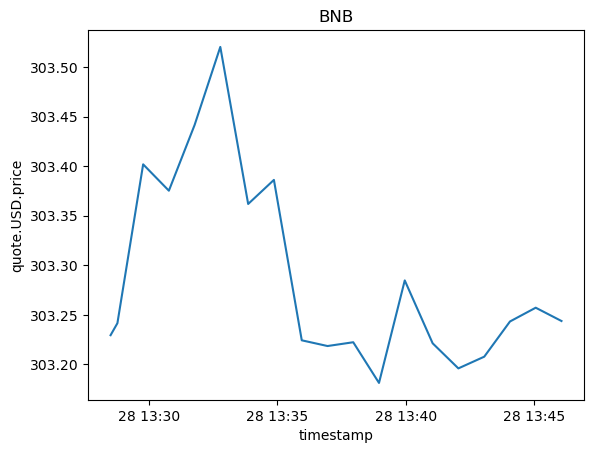

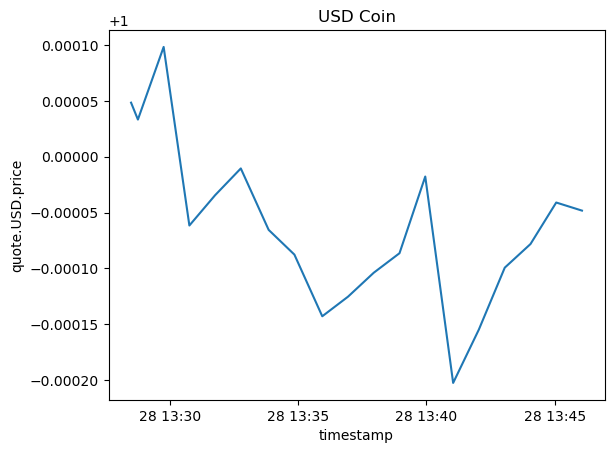

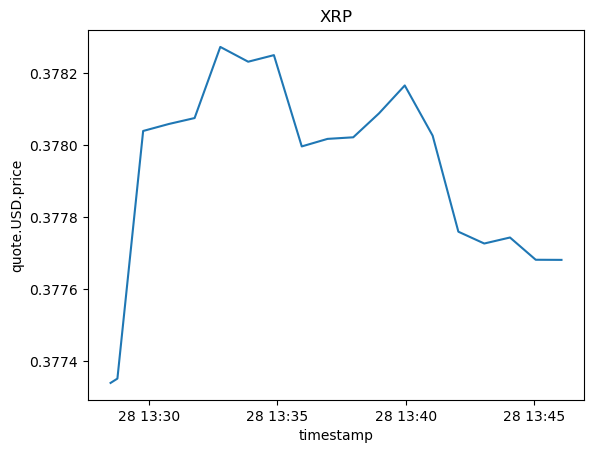

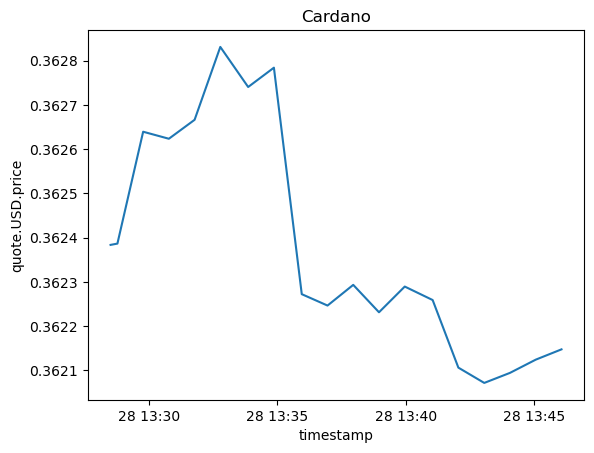

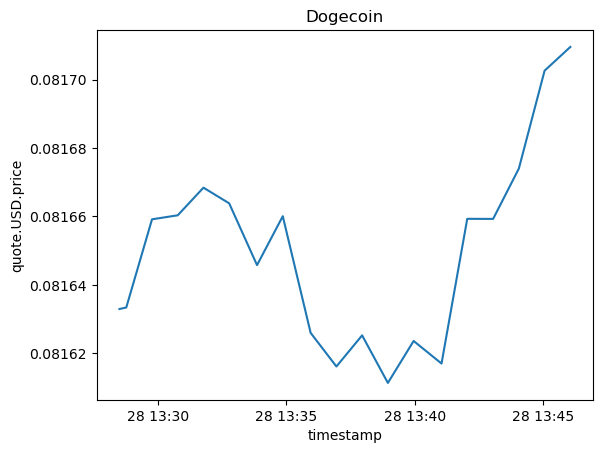

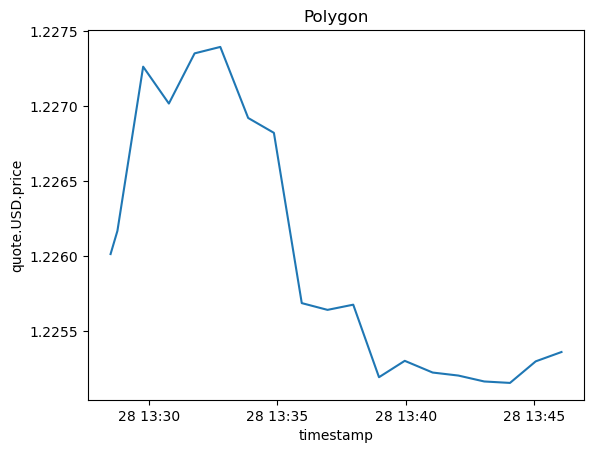

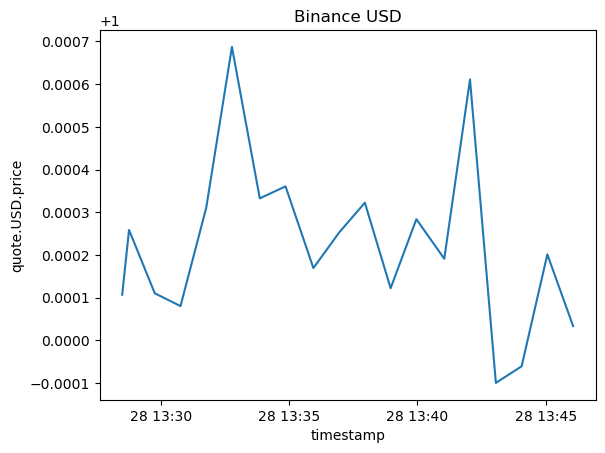

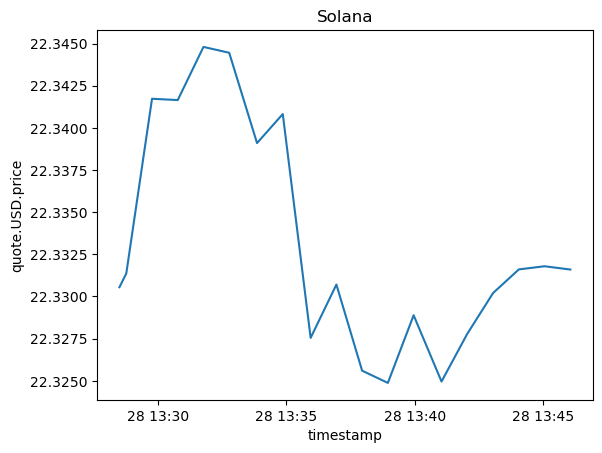

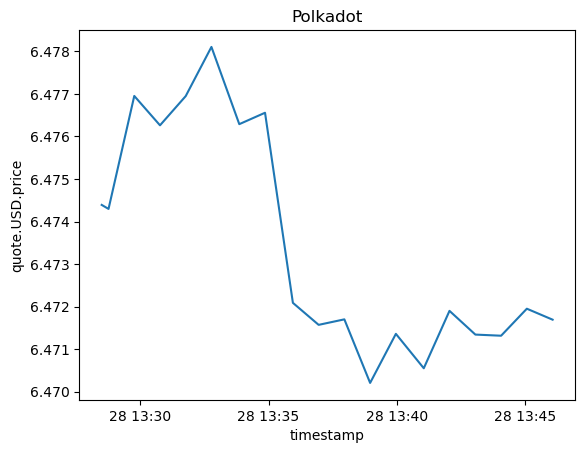

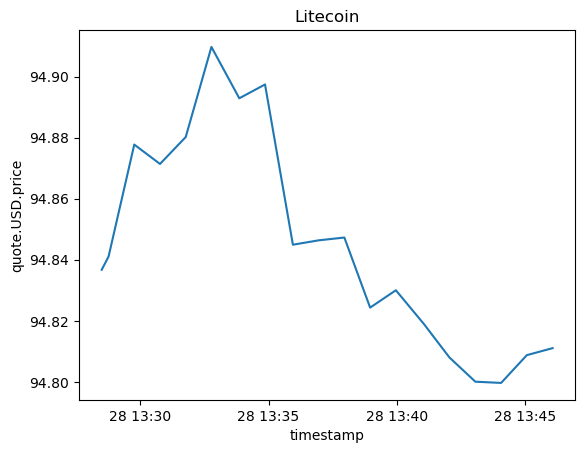

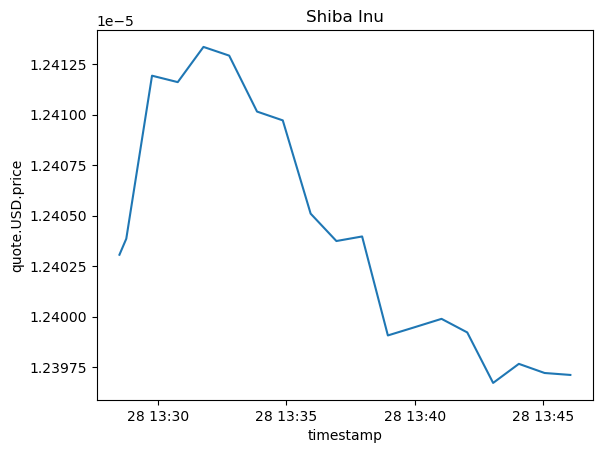

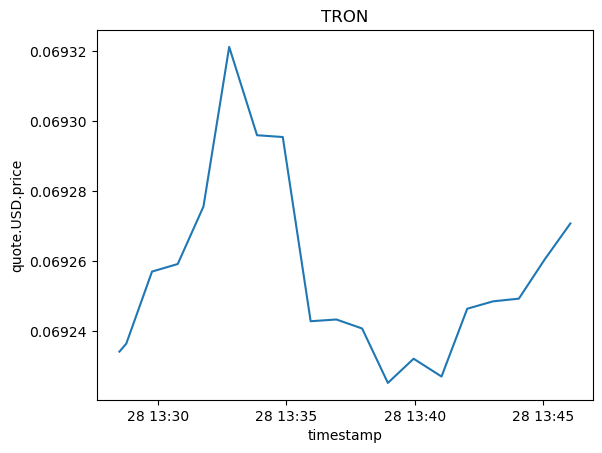

In [13]:
# list of coins to plot
coins = ['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USD Coin', 'XRP', 'Cardano', 
         'Dogecoin', 'Polygon', 'Binance USD', 'Solana', 'Polkadot', 'Litecoin', 'Shiba Inu', 'TRON']

# loop over coins and plot each one
for coin in coins:
    df_coin = df.query("name == @coin")
    sns.lineplot(x='timestamp', y='quote.USD.price', data=df_coin)
    plt.title(coin)
    plt.show()
